The version of the notebook server is: 6.1.4

The server is running on this version of Python: Python 3.8.5

OS Windows 10 Home

Configurable nbextensions Table of Contents (2) compatibility: 4.x, 5.x (https://www.codegrepper.com/code-examples/shell/install+toc2+jupyter+notebook)

<b>Описание проекта:</b>

<b>Прогнозирование температуры звезды</b>

Вам пришла задача от обсерватории «Небо на ладони»: придумать, как с помощью нейросети определять температуру на поверхности обнаруженных звёзд. 

<b>Обычно для расчёта температуры учёные пользуются следующими методами:</b>

* Закон смещения Вина.

* Закон Стефана-Больцмана.

* Спектральный анализ.

Каждый из них имеет плюсы и минусы. Обсерватория хочет внедрить технологии машинного обучения для предсказания температуры звёзд, надеясь, что этот метод будет наиболее точным и удобным.

В базе обсерватории есть характеристики уже изученных 240 звёзд.

Импортируем модули и библиотеки:

In [111]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки работы с графиками
import numpy as np # импорт библиотеки для вычислений
import warnings

warnings.filterwarnings('ignore') # отключаем сообщения об ошибках pandas
pd.set_option('display.max_columns', None) # Сброс ограничений на число выводимых столбцов

## Исследование данных

### Открываем файл с данными и анализируем содержимое

Функция для чтения файла в таблицу с учетом возможности работы на разных платформах и заодно исследование данных в таблицах:

In [112]:
def read_csv(link):
    link1 = 'datasets/' + link
    link2 = '/datasets/' + link
    try:
        name_link = pd.read_csv(link1)
    except:
        name_link = pd.read_csv(link2)
    print('просмотрим первые пять строк')
    display(name_link.head())
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('просмотрим информацию')
    display(name_link.info())
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('посчитаем уникальные значения')
    display(name_link.nunique()) 
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('проверим имена столбцов')
    display(name_link.columns) 
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('проверка на явные дубликаты')
    display('Количество явных дубликатов:', name_link.duplicated().sum()) 
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('проверим численные данные')
    display(name_link.describe()) 
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('проверим корреляции')
    display(name_link.corr()) 
    return name_link

In [113]:
df = read_csv('6_class.csv')

просмотрим первые пять строк


,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,3068,0.002400,0.1700,16.12,0,Red
1,1,3042,0.000500,0.1542,16.60,0,Red
2,2,2600,0.000300,0.1020,18.70,0,Red
3,3,2800,0.000200,0.1600,16.65,0,Red
4,4,1939,0.000138,0.1030,20.06,0,Red


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
просмотрим информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              240 non-null    int64  
 1   Temperature (K)         240 non-null    int64  
 2   Luminosity(L/Lo)        240 non-null    float64
 3   Radius(R/Ro)            240 non-null    float64
 4   Absolute magnitude(Mv)  240 non-null    float64
 5   Star type               240 non-null    int64  
 6   Star color              240 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 13.2+ KB


None

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
посчитаем уникальные значения


Unnamed: 0                240
Temperature (K)           228
Luminosity(L/Lo)          208
Radius(R/Ro)              216
Absolute magnitude(Mv)    228
Star type                   6
Star color                 19
dtype: int64

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
проверим имена столбцов


Index(['Unnamed: 0', 'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color'],
      dtype='object')

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
проверка на явные дубликаты


'Количество явных дубликатов:'

0

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
проверим численные данные


,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,119.50000,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,69.42622,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,0.00000,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,59.75000,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,119.50000,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,179.25000,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,239.00000,40000.000000,849420.000000,1948.500000,20.060000,5.000000


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
проверим корреляции


,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Unnamed: 0,1.000000,0.391056,0.322719,0.167608,-0.257015,0.246505
Temperature (K),0.391056,1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.322719,0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.167608,0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.257015,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.246505,0.411129,0.676845,0.660975,-0.955276,1.000000


Таблица содержит 240 строк - маловато данных для нормального обучения нейросети

колонка Unnamed: 0 явно дублирует индексы ее можно удалить


<b>Признаки для обучения</b>


Luminosity(L/Lo) - Относительная светимость L/Lo — светимость звезды относительно Солнца. ТИП - float64

Radius(R/Ro) - Относительный радиус R/Ro — радиус звезды относительно радиуса Солнца.ТИП - float64

Absolute magnitude(Mv)  - Абсолютная звёздная величина Mv — физическая величина, характеризующая блеск звезды.ТИП - float64

Star color - Звёздный цвет (white, red, blue, yellow, yellow-orange и др.) — цвет звезды, который определяют на основе спектрального анализа. ТИП  - object

Star type - Тип звезды. ТИП - int64 
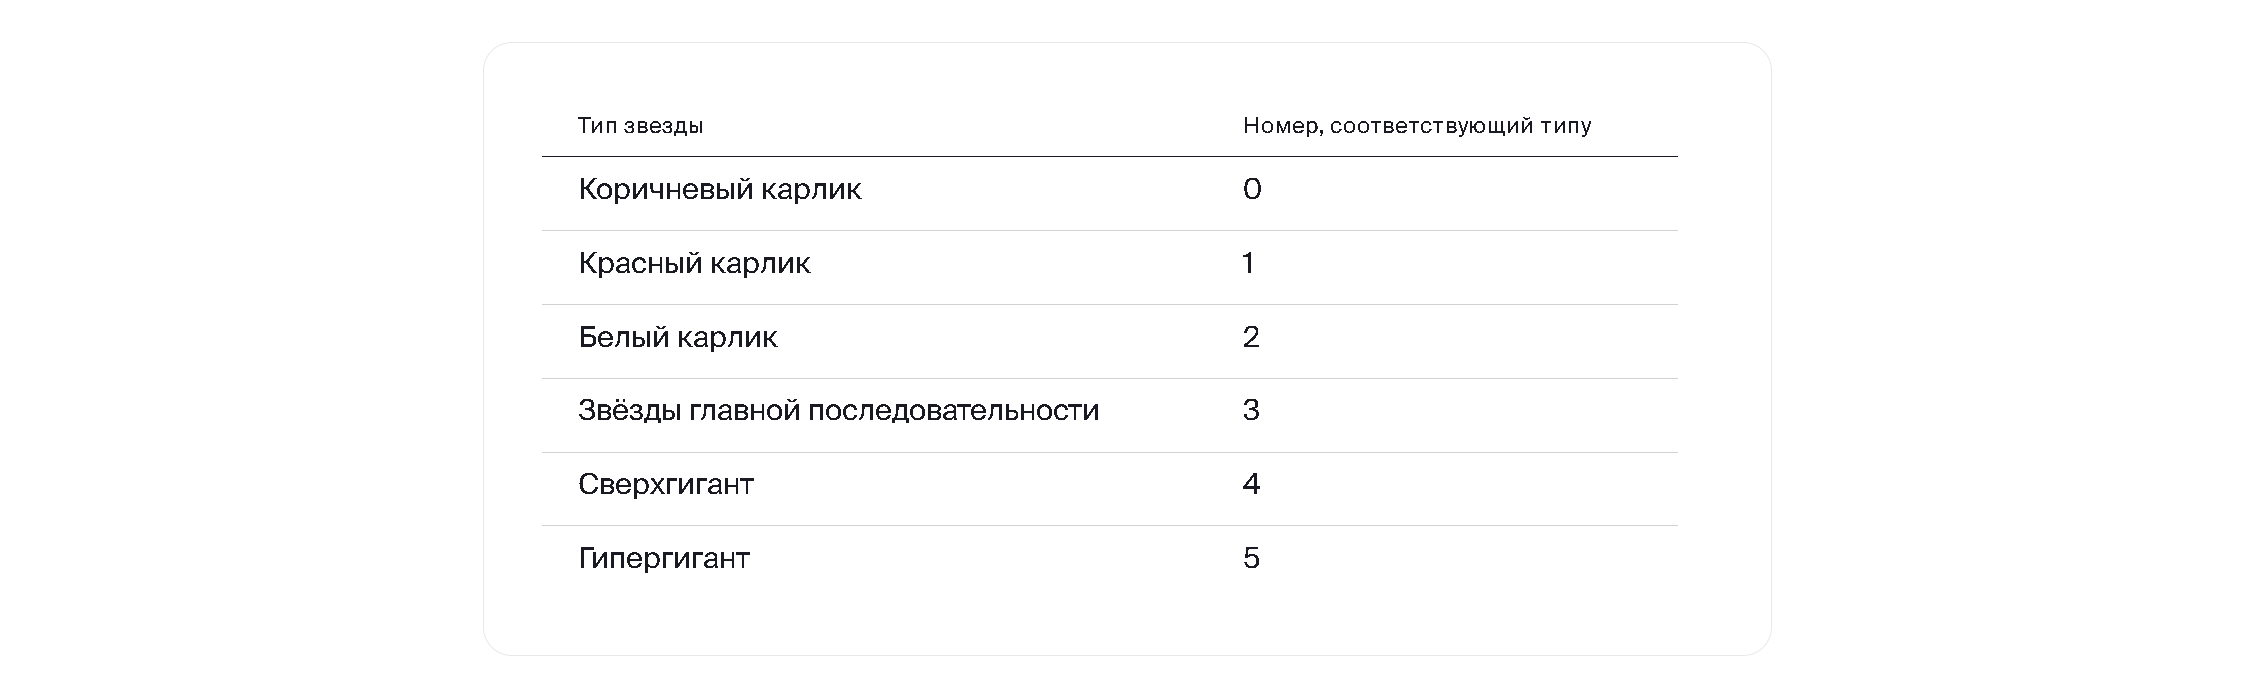





<b>Целевой признак</b>

Temperature (K) - Абсолютная температура T(K) — температура на поверхности звезды в Кельвинах. ТИП - int64 



### Посмотрим на распределения: Построение гистограмм

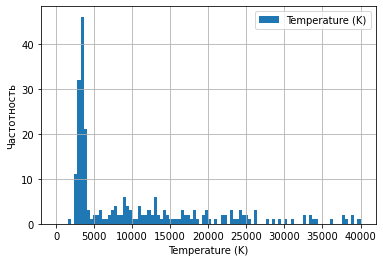

In [114]:
plt.hist(df['Temperature (K)'], range = (0, 40000), bins=100, label = 'Temperature (K)')
plt.ylabel('Частотность')
plt.xlabel('Temperature (K)')
plt.legend()
plt.grid()

<b>Большинство звезд с температурой около 3000 К

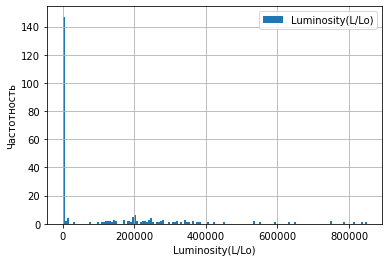

In [115]:
plt.hist(df['Luminosity(L/Lo)'], range = (0, 850000), bins=150, label = 'Luminosity(L/Lo)')
plt.ylabel('Частотность')
plt.xlabel('Luminosity(L/Lo)')
plt.legend()
plt.grid()

<b>Явное скопление светимостей около нуля, помотрим пристальнее:

In [116]:
display(df[df['Luminosity(L/Lo)'] < 0.1])

,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,3068,0.002400,0.17000,16.12,0,Red
1,1,3042,0.000500,0.15420,16.60,0,Red
2,2,2600,0.000300,0.10200,18.70,0,Red
3,3,2800,0.000200,0.16000,16.65,0,Red
4,4,1939,0.000138,0.10300,20.06,0,Red
...,...,...,...,...,...,...,...
205,205,19920,0.001560,0.01420,11.34,2,Blue
206,206,24020,0.001590,0.01270,10.55,2,Blue
207,207,23092,0.001320,0.01040,10.18,2,Blue
208,208,17920,0.001110,0.01060,11.66,2,Blue


<b>Мда уж 209 из 240 звезд почти не светятся - тут весьма мало данных для ярких звезд

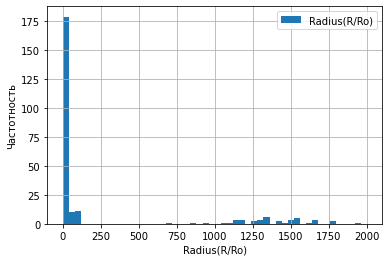

In [117]:
plt.hist(df['Radius(R/Ro)'], range = (0, 2000), bins=50, label = 'Radius(R/Ro)')
plt.ylabel('Частотность')
plt.xlabel('Radius(R/Ro)')
plt.legend()
plt.grid()

<b>Большинство звезд с радиусом близким к Солнцу или не сильно большие, посмотрим внимательнее

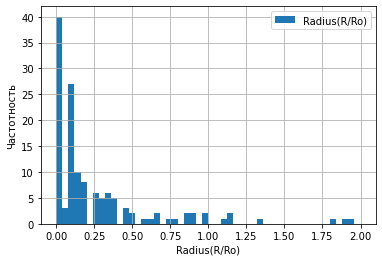

In [118]:
plt.hist(df['Radius(R/Ro)'], range = (0, 2), bins=50, label = 'Radius(R/Ro)')
plt.ylabel('Частотность')
plt.xlabel('Radius(R/Ro)')
plt.legend()
plt.grid()

Посмотрим на звезды меньше солнца

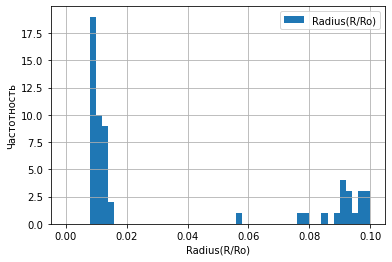

In [119]:
plt.hist(df['Radius(R/Ro)'], range = (0, 0.1), bins=50, label = 'Radius(R/Ro)')
plt.ylabel('Частотность')
plt.xlabel('Radius(R/Ro)')
plt.legend()
plt.grid()

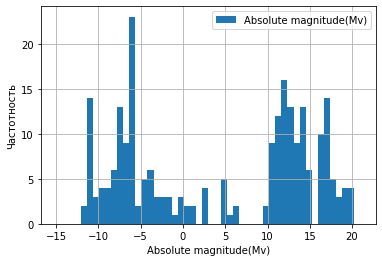

In [120]:
plt.hist(df['Absolute magnitude(Mv)'], range = (-15, 21), bins=50, label = 'Absolute magnitude(Mv)')
plt.ylabel('Частотность')
plt.xlabel('Absolute magnitude(Mv)')
plt.legend()
plt.grid()

<b>Наблюдаются две области скопления показателей: в районе 15 и -7 Mv

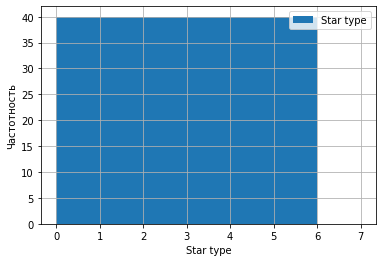

In [121]:
plt.hist(df['Star type'], range = (0, 7), bins=7, label = 'Star type')
plt.ylabel('Частотность')
plt.xlabel('Star type')
plt.legend()
plt.grid()

сранный график, посчитаем уникальные значения.

In [122]:
df['Star type'].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star type, dtype: int64

<b>Ну здесь вообще весьма странная подборка по типу - ибо другие данные явно тяготеют к  показателям Солнца и не наблюдается разбиение по показателям, а тут по типу как то одинаково разбиты данные - тут вполне возможно закралась ошибка в определении типов, искуственно как то. Хотя судя по корреляции этот параметр весьма хорошо влияет на температуру звезды.

### Проверка на не явные дубликаты:

In [123]:
df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

Наблюдаются не явные дубликаты, следует переименовать некоторые значения, а именно приведем к следующим названиям:

Whitish Это White

Yellowish White - желтоватый, можно оставить просто Yellowish (тут же yellow-white и 'White-Yellow')

ИТОГО:

'Red', 'Blue-White', 'White', 'Yellowish', 'Pale-Yellow-Orange', 'Blue', 'Orange', 'Orange-Red'

'Red', 'White', 'Pale yellow orange', 'Orange', 'white','Orange-Red'

### <b>Выводы и замечания:</b>

* требуется переименование всех столбцов в формат snake_case (думаю единицы измерения вообще можно убрать из названий)
* пропусков и пустых значений в даных не наблюдается
* явных дубликатов нет
* проблем с минимальными и максимальными значениями нет
* температура хорошо коррелирует со всеми числовыми данными кроме относительного радиуса
* есть не явные дубликаты - требуется переименование
* столбец Unnamed: 0	можно удалить
* 240 строк данных это очень мало, для обучения нейросети хорошо бы увеличить количество строк данных
* в столбце Star color категориальные данные - требуется преобразование OHE
* масштаб данных в столбцах различный - требуется массштабирование данных

## Предобработка данных по результатам анализа

### Удалим столбцы не влияющие на предсказания

In [124]:
df = df.drop(['Unnamed: 0'], axis=1)

In [125]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


### Переименование столбцов


In [126]:
display(df.columns)

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color'],
      dtype='object')

In [127]:
df.set_axis(['temperature', 'luminosity', 'radius', 'absolute_magnitude',
       'star_type', 'star_color'],axis = 'columns',inplace = True)

In [128]:
df.head()

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


### Удаление не явных дубликатов

Напишем функцию замены

In [129]:
def replace(column, lists, word):
    for i in lists:
        df[column] = df[column].str.replace(i, word)

In [130]:
replace('star_color', ['Blue White', 'Blue white', 'Blue-white', 'Blue white ', 'Blue-White '], 'Blue-White')

In [131]:
replace('star_color', ['Yellowish White', 'Whitish', 'yellow-white', 'White-Yellow', 'yellowish'], 'Yellowish')

In [132]:
replace('star_color', ['Blue '], 'Blue')

In [133]:
replace('star_color', ['white'], 'White')

In [134]:
replace('star_color', ['Pale yellow orange'], 'Pale-Yellow-Orange')

In [135]:
df['star_color'].unique()

array(['Red', 'Blue-White', 'White', 'Yellowish', 'Pale-Yellow-Orange',
       'Blue', 'Orange', 'Orange-Red'], dtype=object)

Теперь все в порядке, OHE даст нужные результаты

In [136]:
df.head()

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


Выводы: необходимая предобработка данных произведена, теперь можно приступать к преобразованию категориальных данных и массштабированию данных

## Разделение на выбрки, OHE , массштабирование